# Amirmahdi Farzane - 810100194

# Artificial Intelligence CA1: *Genetic Algorithms*  

In this assignment, the curve fitting problem is solved using a genetic algorithm.

Curve fitting is finding the curve that best fits a number of data points. I specify curve by its coefficients.
The goal is determine the relationship between the independent variable (x) and the dependent variable (y).

Genetic algorithm is a search and optimization technique inspired by the process of natural selection
I set the values ​​of the genetic algorithm in such a way that it solves this problem.

## Genetic Representation

Each coeffocoent is considered a gene.  
A chromosome consists of n+1 genes where n is the degree of polynomial phrase. 

First gene in chromosome is coeffocoent of x power 0.   
Second gene is coeffocoent of x power 1 and ...                                                                                                             
The last gene is coeffocoent of x power n.

In [1661]:
import random
import bisect
import copy
import random
from typing import NamedTuple
from dataclasses import dataclass
from itertools import accumulate
import matplotlib.pyplot as plt

`Input` variabels:

- `poly_degree`: The degree of polynomial phrase.
- `min_coeffocoent`: The minimum possible coeffocoent
- `max_coeffocoent`: The maximum possible coeffocoent
- `points_number`: The number of points that are on the curve
- `points`: Contains cordinates of each poin

### I get input after `solve_problem` function ###

`Problem parameters`

- `prob_co`: Probability of a crossover happening between two chromosomes.
- `prob_m`: Probability of a mutation happening in a chromosome.
- `prob_carry`: The percentage of the best chromosomes that will be carried directly to the next generation.
- `population_size`: The count of all chromosomes which is called the population.
- `max_generations`: The maximum number of generations that the algorithm will explore to find a solution.

Problems must be choose base on each input of problem.
But mutation_prob is so small and corss-over is large(larger than 0.1)

In [1662]:
prob_xover = 0.5
prob_mutate = 0.0001
# prob_carry = 0.001
population_size = 1000
max_generations = 100

## Initial Population

The `gen_population` function takes our input and creates `size` chromosomes.  
We will use this to get our initial population.

In [1663]:
def make_population(min_coe,max_coe,chro_size,chro_number):
    population = [None]*chro_number
    for i in range(chro_number):
        population[i] = [random.randint(min_coe,max_coe) for j in range(chro_size)]
    return population


## Fitness Function

We will define the fitness of a chromosome as follows:  

$$ sum  over  all  points ((y[i] - output for x[i])^2) $$

In which chromosome is the result of the mathematical expression, and goal is the result we are seeking.  
Basically, the closer the result is to the goal, the shorter the fitness will be.  
The fitness is between 0 and maximum possible number that will be made by fittnes function. The fitness of 0 means that the chromosome is our solution.


In [1664]:
def calc_fitness(points , chromo, chromo_size , coes) :
    fitness = 0
    for point in points:
        y = 0
        for i in range(chromo_size):
            y += (chromo[i] * (point[0])**i)
        fitness+=(pow(y - point[1] , 2))
    return fitness

Below function used for random input . I assigned all coefficients 1.

In [1665]:
def calc_fitness(points , chromo, chromo_size) :
    fitness = 0
    for point in points:
        y = 0
        for i in range(chromo_size):
            y += (chromo[i] * (point[0])**i)
        fitness+=(pow(y - point[1] , 2))
    return fitness

## Genetic Selection and Operations

In the next section, 4 functions are defined with each being a step in reaching the next generation.

- `sort_popu_by_fittness`:  
  Here, the population is sorted by its fitness and `carry_count` of the best chromosomes are returned.

  i used carry but excecution time was so bad and i got simmilar and faster result without carry of good chromosoms.

- `peek_new_popu`:  
  Here, a new population is generated which has the same size as the previous, but each member is chosen by a fortune wheel where the better chromosomes have a higher chance of winning.  
  This is implemented with a cumulative sum on the rank probabilitie of each gene.
  The better gene has bigger chance of choose because has bigger interval that can be chosen with random probibality.

- `create_crossover_pool`:  
  Here, a modified population is returned in which some pairs of chromosomes, with the chance of `prob_xover`, have been crossed over .I used 1-point crossover but after that i do cross-over with random numper of points. And better diversity 
  
- `create_mutate_pool`:  
  Here, a modified population is returned in which some chromosomes, with the chance of `prob_mutate`, have had a single gene of them mutated to a random operand or operator, based on what the type of the selected gene is.

In [1666]:
def sort_popu_by_fittness(population: list[list[int]],
                        fitnesses: list[float],
                        carry_count: int) -> list[list[int]]:
    sorted_population = sorted(zip(fitnesses, population), reverse=True, key=lambda pair: pair[0])
    carry = [pair[1] for pair in sorted_population[len(population)-carry_count : len(population)]]
    new_sorted_popu = [pair[1] for pair in sorted_population[:len(population)]]
    return copy.deepcopy(carry) , copy.deepcopy(new_sorted_popu)




In [1667]:
def peek_new_popu(popluation: list[list[int]]) -> list[list[int]]:
    n = len(popluation)
    sum_of_ranks =  ( n * (n +1) )/2
    probs = [i/sum_of_ranks for i in range(1,n+1)]
    cumulative_sum = list(accumulate(probs))
    new_poop = []*len(popluation)
    for _ in range(n):
        random_var = random.random()
        index = bisect.bisect_left(cumulative_sum , random_var)
        new_poop.append(copy.deepcopy(popluation[index]))
    return copy.deepcopy(new_poop)

In [1668]:
def create_crossover_pool(population: list[list[int]], prob_xover: float , chromo_size:int):
    xover_pool = copy.deepcopy(population)
    for i in range(0, len(xover_pool)-1):
        
        if random.random() < prob_xover:
            cross_over_times = 2
            # we can dow cross-over in one or two or three points based on may results i choosed two for have more variety
            for j in range(cross_over_times):
                    point = random.randint(0, len(xover_pool[i]))
                    xover_pool[i][  :point], xover_pool[i+1][ : point] = xover_pool[i+1][ : point], xover_pool[i][ :point]
        

    return xover_pool

In [1669]:
def create_mutated_pool(population: list[list[int]], prob_mutate: float, min_coe:int, max_coe:int):
    new_popu = copy.deepcopy(population)
    for chrom in new_popu:
        random_prob = random.random()
        # print(random_prob)
        if(random_prob < prob_mutate):
            index = random.randint(0,len(chrom)-1)
            chrom[index] = random.randint(min_coe,max_coe)
    return new_popu

Below cell keeps algorithm resluts.

In [1670]:
# x_cord_fix20 = []
# y_cord_fix20 = []
# x_mutation_0001 = []
# y_mutation_0001 = []
# x_mutation_01 = []
# y_mutation_01 = []

The `solve_problem` function does the process of finding the equation.  
The while loop is repeated `max_generations` times with each iteration corresponding to a generation, until the equation is found.

The process is as follows:

- Fitness is calculated for each chromosome. 

- The carried and sorted  population is created.  

- Peek new population base on chromusomes' ranks.

- And then do cross-over.

- And then mutation.

In [1671]:
def solve_problem(points , poly_degree , min_coeffocoent , max_coeffocoent , population_size ):
    new_popu = make_population(min_coeffocoent , max_coeffocoent , chro_size = poly_degree+1 , chro_number = population_size)
    fittness = []
    for chromo in new_popu:
        fitt = calc_fitness(points , chromo , poly_degree+1)
        fittness.append(fitt)
    for i in range(max_generations):

        fittness = []
        for chromo in new_popu:
            fitt = calc_fitness(points , chromo , poly_degree+1)
            fittness.append(fitt)
        avg = sum(fittness)/len(new_popu)
        if(i%10 == 0):
            print(i , avg , min(fittness))
            
        carried , sorted_popu = sort_popu_by_fittness(new_popu , fittness , len(new_popu))
        peeked_popu = peek_new_popu(sorted_popu)
        cross_overd_popu = create_crossover_pool(peeked_popu , prob_xover , poly_degree+1)
        mutated_popu = create_mutated_pool(cross_overd_popu , prob_mutate , min_coeffocoent , max_coeffocoent)
        # carry_popu_size = int(prob_carry*population_size)
        # splited_popu = mutated_popu[ : population_size - carry_popu_size]
        # splited_popu.extend(carried_popu)
        new_popu = mutated_popu

    return new_popu

Question description input

In [1672]:
# poly_degree = 3
# min_coeffocoent,  max_coeffocoent = -5,5
# points_number = 4
# points = [[0,1] , [1,0] , [2,-5] , [-1,-8]]

Get input by terminal

In [1673]:
# poly_degree = int(input())
# min_coeffocoent,  max_coeffocoent = map(int,input().split())
# points_number = int(input())
# points = []
# for _ in range(points_number):
#     p_x , p_y = map(int,input().split())
#     points.append([p_x,p_y])

Get random input

In [1674]:
def calc_equation_for_x(x,dgree):
    ans = 0
    for i in range(dgree+1):
        ans+=i*(pow(x,i))
    return(ans)

In [1675]:
poly_degree = 5
min_coeffocoent,  max_coeffocoent = -5,5
points_number = 20
points = []
for _ in range(points_number):
    p_x = random.randint(-3,3)
    p_y = calc_equation_for_x(p_x , poly_degree)
    points.append([p_x,p_y])

In [1676]:
result = solve_problem(points , poly_degree , min_coeffocoent , max_coeffocoent , population_size)

0 15064660.091 8179
10 9718.435 0
20 18.611 0
30 0.0 0
40 0.0 0
50 0.0 0
60 763.568 0
70 0.0 0
80 0.0 0
90 0.0 0


In [ ]:
result

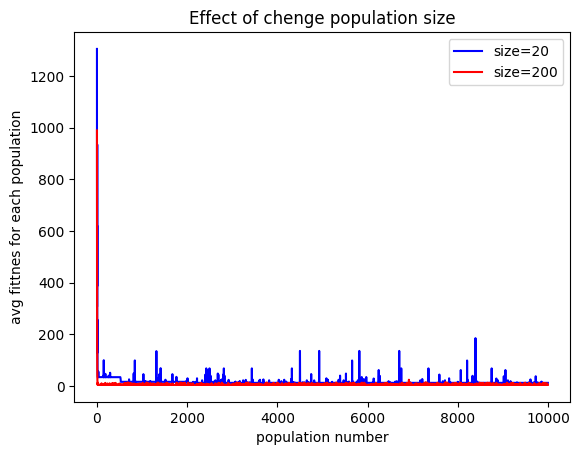

In [1678]:
plt.plot(x_cord_fix20 , y_cord_fix20 ,color='b' , label = 'size=20')
plt.plot(x_cord_fix200 , y_cord_fix200,color='r' , label = 'size=200')
plt.xlabel("population number") 
plt.ylabel("avg fittnes for each population") 
plt.title("Effect of chenge population size") 
plt.legend() 
plt.show() 


I set population size with 20 , 200.
For 10000 populations.
Other parameters were fixed.
As we see result for this two variables . for 200 size, first fittness is better than size 20. 
For 200 , fitness soonner converged because of more variety of chromosums.

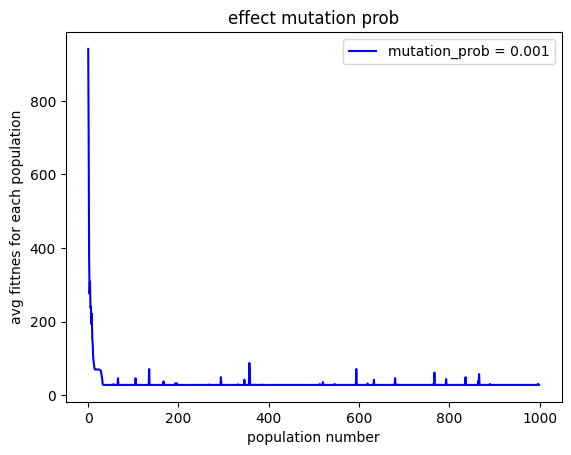

In [1679]:
plt.plot(x_mutation_0001 , y_mutation_0001 ,color='b' , label = 'mutation_prob = 0.001')
# plt.plot(x_mutation_01 , y_mutation_01,color='r' , label = 'mutation_prob = 0.1')
plt.xlabel("population number") 
plt.ylabel("avg fittnes for each population") 
plt.title("effect mutation prob") 
plt.legend() 
plt.show() 


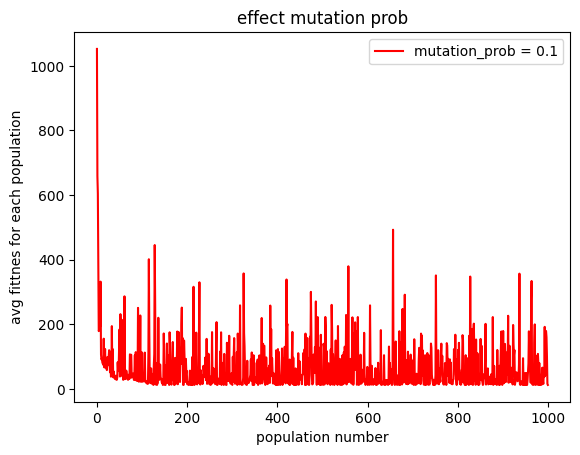

In [1680]:
# plt.plot(x_mutation_0001 , y_mutation_0001 ,color='b' , label = 'mutation_prob = 0.001')
plt.plot(x_mutation_01 , y_mutation_01,color='r' , label = 'mutation_prob = 0.1')
plt.xlabel("population number") 
plt.ylabel("avg fittnes for each population") 
plt.title("effect mutation prob") 
plt.legend() 
plt.show() 


As we see in above plots large probabality of mutation leads to a lot of chenge on avg and dosen't convert.
But reasonable probabality of mutation leads to appropriate result.

Below function is just for result of problem with inputs of discription .

In [1681]:
def my_curve(x):
    return (-1 + 4*x + -3*(x**2) + 0*(x**3))

In [1682]:
x_ = [i for i in range(5)]
y_ = [ my_curve(x_[i]) for i in range(5)]

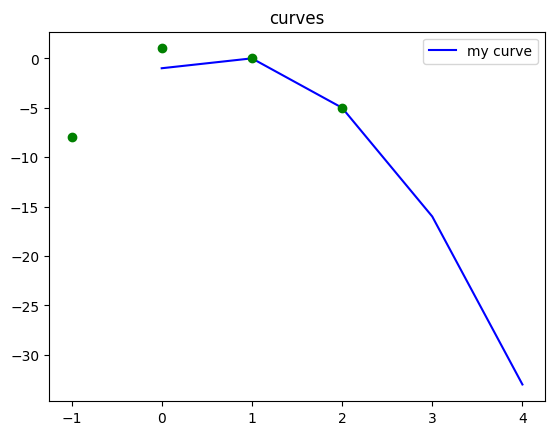

In [1683]:
plt.plot(x_ , y_,color='b' , label = 'my curve')
plt.plot([1] , [0],color='g' ,marker='o')
plt.plot([0] , [1],color='g' ,marker='o')
plt.plot([2] , [-5],color='g' ,marker='o')
plt.plot([-1] , [-8],color='g' ,marker='o')
plt.title("curves") 
plt.legend() 
plt.show() 


## Questions

1. *The problems caused by an extremely large or small population size:* 
    If the population is too large, the algorithm will take more time and resources than needed. 
    If the population is too small, diversity decreases and not many cases are checked in each generation because when first population is small we have a few number of gens in diffrent permutation so chance of get better population will decrease We can make this better by increasing the mutation probability and checking more generations but based on our pissible time and our resources. 


2. *The effects of a growing population on the algorithm:*  
    If the population grows with each generation, although the precision of the algorithm may increase because of more diversity, the time and memory consumption will increase in each step which is a problem and may reach some limitations.  
    The population size is kept the same because it is supposed to converge by populating it with the chromosomes closer to the answer and discarding the ones further away. By adding more in each step, we are not working in favor of the convergence.

3. *The distinct effects of crossover and mutation:*  
    Mutation changes a chromosome directly while Crossover will create new chromosomes by combining two chromosomes.

    Crossover is done with a much higher probability than mutation based on our problem's cituations.  

    Crossover hopes to reach better chromosomes by combining two good chromosomes while mutation is used to escape getting stuck in a local extremum.  

    Mutation focuses on exploration, allowing for the discovery of new areas in the solution space while crossover focuses on exploitation, combining the strengths of different parents to create improved solutions.

    No . we can't . We must use both of them because , if just use coss-over after some generations we stuck in generation with same chromosomes and we can't get better because each cross-over make same chromosome.
    And using just mutation is not good because it's diversity is randomly but we must make diversity on apprpriate chromosome that we got by previous generation and it is possible by cross-over.

4. *Approaches to solving this specific problem faster:*  
    Fitness function, parameters like the probability of crossover and mutation,  population size and amount of choosed good chromsoms of each population should be chosen carefully.Checck all random parameters effect on teim of getting to result can impact on performance.
  
    Also, the method of crossover and mutation functions can affect the performance of the algorithm that we must choose based on our problem's approach.

    And defining accurater fitness function lead to better answer beacause choosing good chromsoms increase probabality of get better result.

    Combine the genetic algorithm with local search heuristics in a memetic algorithm. This hybrid approach can enhance convergence rates and help find higher-quality solutions by utilizing the strengths of both genetic algorithms and local search methods.


5. *Reasons for the stagnation of chromosomes and getting stuck and providing solutions:*  
    Without mutation and cross-over obviously algorithm will get stuck because after making some populations , better chromosome choosed and all of those will be simmilar so new chromosome dosen't chenge.And we can't get better answer and it is not our goal.

    So we use cross-over but again after some peeking better chromosoms , cross-over make simmilar chromosome because each part of chromosoms are same in new population so this method would not work.

    Mutation is better because it is not dependent on other chromosome and can see new areas by chengeing specific gene.
    and is used to escape local extremums which is implemented in this assignment.

    And in case of getting stuck even after mutations ,multi-starting the algorithm can overcome the problem.  
    Multi-starting is re-running the algorithm with a new initial population.

    (If the mutation rate is set too high, it can introduce too much randomness into the population. This excessive randomness can hinder the convergence process because good solutions might be lost due to frequent, disruptive mutations.)

6. *Stopping the algorithm if a solution does not exist:*  

    We can limit the numbers that we start the algorithm all over again (multi-start) in case of not finding a solution in specific number of generations. After that we can assume that probably there is no solution.For example we can do multi-starting five times and if cant't find answer we will say problem has no solution.

7. *What effect increasing order of polynomial expression on finding answer time:*  
    
    Deppends of diffrent parameters of problem but for each iteration time increase linear . And now we need for solve problem it means all iterations so time complixity is more than O(n) maybe O(n^2) and even for larger degrees diffrent but anyway is higher-polynomial.

8. "How does changes in the number of points affect the execution of the algorithm?"

    For each generate a new generation , i calculate fittness for each gene(n) and each fittnes calculate over all input points(m) so order of algprithm is O(n*m) after increase number of points order is O(n * (m+c)) so time changing is linear.

    Also with more input points we can find better curve(based on our problem's parameters every time too many inputs is not good) because it give better estimate of our fitting.